## TASK-3
## Performing_Logistic_Regression

In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('C:\\Users\\Lenovo\\cleaned_data.csv')

In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [11]:
df['LIMIT_BAL'].describe()

count     26664.000000
mean     167919.054905
std      129839.453081
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: LIMIT_BAL, dtype: float64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(df[['LIMIT_BAL']].values,df[['default payment next month']].values,test_size=0.2,random_state=1)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression()

In [29]:
lr.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [50]:
y_predict = lr.predict_proba(x_test)
y_predict

array([[0.83977514, 0.16022486],
       [0.96246012, 0.03753988],
       [0.83977514, 0.16022486],
       ...,
       [0.7990654 , 0.2009346 ],
       [0.53445688, 0.46554312],
       [0.68119193, 0.31880807]])

In [48]:
metrics.confusion_matrix(y_test,y_predict)

array([[4105,    0],
       [1228,    0]], dtype=int64)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [72]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [37]:
metrics.roc_auc_score(y_test,y_predict)

0.5

the roc_auc_score for eductation feature is also somewhat 0.5 which is same for this feature. 

_________________________________________________________________________
**Now, plot the ROC curve.**


In [51]:
pos_proba = y_predict[:,1]
pos_proba

array([0.16022486, 0.03753988, 0.16022486, ..., 0.2009346 , 0.46554312,
       0.31880807])

In [55]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

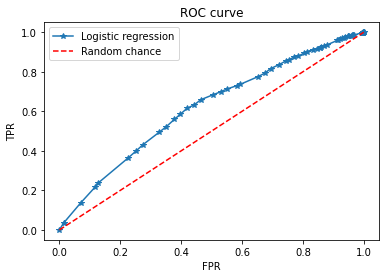

In [56]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [57]:
metrics.roc_auc_score(y_test, pos_proba)

0.6167380488559673

In [58]:
thresholds

array([1.48275106, 0.48275106, 0.47241876, 0.46554312, 0.44841681,
       0.43141197, 0.41456732, 0.39792008, 0.38150571, 0.36535755,
       0.34950665, 0.33398154, 0.31880807, 0.3040093 , 0.28960543,
       0.27561375, 0.2620487 , 0.24892186, 0.23624208, 0.22401555,
       0.21224595, 0.2009346 , 0.19008061, 0.17968109, 0.1697313 ,
       0.16022486, 0.15115393, 0.14250939, 0.13428103, 0.1264577 ,
       0.1190275 , 0.11197791, 0.10529594, 0.09896826, 0.09434065,
       0.09298132, 0.08732145, 0.08197496, 0.07692824, 0.07216779,
       0.06768032, 0.06345281, 0.05947251, 0.05572704, 0.05220436,
       0.04889282, 0.04578121, 0.0428587 , 0.0401149 , 0.03753988,
       0.0351241 , 0.03285848, 0.03073434, 0.02874343, 0.02687791,
       0.02513034, 0.02349365, 0.02196116, 0.01918377, 0.01792725,
       0.01675162, 0.01565186, 0.00791051, 0.00738681, 0.0056147 ])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [76]:
precision, recall, thresholds = precision_recall_curve(y_test,pos_proba)

In [77]:
auc = metrics.roc_auc_score(y_test, pos_proba)

In [ ]:
auc = auc(recall, precision)

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [39]:
y_predict1 = lr.predict(x_train)

In [43]:
metrics.roc_auc_score(y_train,y_predict1)

0.5

    How is this different, conceptually and quantitatively, from your earlier calculation?
It's the same as for testing. roc_score=0.5 means that these features are not good predicatators.
we need to select some features by using univariate feature method or random forest .
Also, due to 0.5 threshold in scikit library we got the predictions as positives. 